## Лабораторная работа №1 | Вариант 5

Выполнил: Seriy Nikita

### 1. Numpy

In [109]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

- Для этого использован метод `np.identity()`, который задаёт единичную матрицу размера `NxN` без возможности манипуляций входными аргументами над главной диагональю. 

In [110]:
diagonal_ones_matrix = np.identity(3)
print(diagonal_ones_matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

- Использован метод `np.dtype` и тип `uint8`. После вывода типа на экран получим тип `u1`. 
- `u1` — это краткая запись этого типа данных в NumPy.
- Форматирование согласно pep-8.

In [111]:
rgba_dtype = np.dtype([
    ('R', np.uint8),  
    ('G', np.uint8),  
    ('B', np.uint8),  
    ('A', np.uint8)   
])

print(rgba_dtype)

[('R', 'u1'), ('G', 'u1'), ('B', 'u1'), ('A', 'u1')]


3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

- В разделе `floating point error handling` есть метод `np.setter()`. Пример взят на основе документации.

In [114]:
orig_settings = np.seterr(all='ignore')  
np.seterr(over='raise')
try:
    print(np.int16(32000) * np.int16(3))  # 96000 выходит за пределы допустимого диапазона для int16 (который от -32768 до 32767) 
except FloatingPointError as e:
    print("Caught error:", e)
    
np.seterr(**orig_settings)

Caught error: overflow encountered in scalar multiply


{'divide': 'ignore', 'over': 'raise', 'under': 'ignore', 'invalid': 'ignore'}

4. Создайте случайный вектор размера 10 и отсортируйте его

In [116]:
random_vector = np.random.rand(10)
sorted_random_vector = np.sort(random_vector)[::1]
print(sorted_random_vector)

[0.08510954 0.09221764 0.17001526 0.36605076 0.42219286 0.52931124
 0.57148455 0.6203791  0.76185006 0.85447327]


5. Создайте read-only массив(неизменяемый)

In [117]:
random_array = np.random.rand(5, 5)
random_array.flags.writeable = False
try:
    random_array[0, 0] = 10  
except ValueError as e:
    print("Ошибка:", e)

Ошибка: assignment destination is read-only


6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [119]:
cartesian_coordinates = np.random.rand(10, 2)

x = cartesian_coordinates[:, 0]
y = cartesian_coordinates[:, 1]

r = np.sqrt(x**2 + y**2)

theta = np.arctan2(y, x)
polar_coordinates = np.column_stack((r, theta))

print("Декартовы координаты (x, y):", cartesian_coordinates, sep='\n', end='\n\n')
print("Полярные координаты (r, θ):", polar_coordinates, sep='\n')

Декартовы координаты (x, y):
[[0.85639643 0.9335531 ]
 [0.27864664 0.01073355]
 [0.12180575 0.764563  ]
 [0.22326744 0.86305444]
 [0.73981722 0.96149476]
 [0.82830789 0.34087528]
 [0.27755689 0.63793788]
 [0.81932557 0.35852984]
 [0.79648926 0.72423779]
 [0.89817631 0.71037244]]

Полярные координаты (r, θ):
[[1.26686078 0.828477  ]
 [0.2788533  0.03850127]
 [0.7742049  1.41280981]
 [0.89146582 1.31765149]
 [1.21317835 0.9149662 ]
 [0.89570638 0.39040814]
 [0.69570293 1.16041511]
 [0.89433665 0.41248717]
 [1.07652938 0.73792273]
 [1.14514177 0.66917076]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [124]:
# 1) Задаю тип данных с полями x и y
coord_dtype = np.dtype([('x', np.float64), ('y', np.float64)])

# 2) Создаю равномерную сетку координат
n_points = 5  # Число точек на каждой оси 
x_values = np.linspace(0, 1, n_points)
y_values = np.linspace(0, 1, n_points)

x_grid, y_grid = np.meshgrid(x_values, y_values)

# 3) Создаю структурированный массив с координатами x и y
structured_array = np.zeros((n_points * n_points,), dtype=coord_dtype)
structured_array['x'] = x_grid.ravel()
structured_array['y'] = y_grid.ravel()

print("Структурированный массив координат (x, y):", structured_array, sep='\n')

Структурированный массив координат (x, y):
[(0.  , 0.  ) (0.25, 0.  ) (0.5 , 0.  ) (0.75, 0.  ) (1.  , 0.  )
 (0.  , 0.25) (0.25, 0.25) (0.5 , 0.25) (0.75, 0.25) (1.  , 0.25)
 (0.  , 0.5 ) (0.25, 0.5 ) (0.5 , 0.5 ) (0.75, 0.5 ) (1.  , 0.5 )
 (0.  , 0.75) (0.25, 0.75) (0.5 , 0.75) (0.75, 0.75) (1.  , 0.75)
 (0.  , 1.  ) (0.25, 1.  ) (0.5 , 1.  ) (0.75, 1.  ) (1.  , 1.  )]


8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [214]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))

C = 1.0 / (x[:, np.newaxis] - y) # Выбор всех элементов вдоль оси с помощью двоеточия, повышение размерности матрицы Х добавлением новой оси

print("Массив x:", x, "Массив y:", y, sep='\n', end='\n\n')
print("Матрица Коши C:", C, sep='\n', end='\n')


Массив x:
[-0.56032709  0.36774135  1.70805314  0.206889   -0.65703283]
Массив y:
[ 0.13990108  0.01552844 -1.19830228  2.53802479 -1.55662044]

Матрица Коши C:
[[-1.42810592 -1.73654665  1.56745908 -0.32275224  1.00372044]
 [ 4.38903978  2.83919183  0.63855182 -0.46076931  0.5196528 ]
 [ 0.63769326  0.59083333  0.34407354 -1.20486043  0.30630934]
 [14.92806481  5.22573734  0.71164689 -0.42897544  0.56705112]
 [-1.2548092  -1.48685338  1.84750866 -0.3129834   1.11162046]]


9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [125]:
float_array = np.array([1.5, 2.3, 3.7, 4.9], dtype=np.float32)
float_array = np.round(float_array).astype(np.int32, copy=False) 
print(float_array)

[2 2 4 5]


10. Как случайно заменить p элементов в 2D массиве?

In [123]:
array = np.arange(25).reshape(5, 5)
print("Исходный массив:", array, sep='\n', end='\n\n')

p = 5 
n_rows, n_cols = array.shape

# Генерация p случайных индексов в развернутом массиве 
random_indices = np.random.choice(n_rows * n_cols, p, replace=False)

# Преобразование одномерных индексов в двумерные
row_indices, col_indices = np.unravel_index(random_indices, (n_rows, n_cols))

# Замена выбранных элементы на новые значения (например, на -1)
array[row_indices, col_indices] = -1
print("Массив после замены:", array, sep='\n')

Исходный массив:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

Массив после замены:
[[ 0  1 -1  3  4]
 [-1  6 -1  8  9]
 [-1 11 12 13 14]
 [15 16 -1 18 19]
 [20 21 22 23 24]]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `df.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [126]:
import pandas as pd

In [162]:
df = pd.read_csv('data.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


1. Узнайте сколько было на борту человек

In [163]:
total_passengers_number = df.shape[0]
print(total_passengers_number)

891


2. Какой медианный и средний возраста пассажиров

In [164]:
median_age = round(df['Age'].median(), 2)
mean_age = round(df['Age'].mean(), 2)

print("Медианный возраст: ", median_age, "Средний возраст", mean_age, sep='\n')

Медианный возраст: 
28.0
Средний возраст
29.7


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [165]:
# 1) Разделяю пассажиров на детей и взрослых
kids = df[df['Age'] < 16]
adults = df[df['Age'] >= 16]

# 2) Считаю процент выживших среди подгрупп
kids_survival_rate = round((kids['Survived'].mean()) * 100, 2)
adults_survival_rate = round((adults['Survived'].mean()) * 100, 2)

print("Процент выживаемости детей:", kids_survival_rate, "Процент выживаемости взрослых:", adults_survival_rate, sep='\n')

Процент выживаемости детей:
59.04
Процент выживаемости взрослых:
38.19


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

- Результаты косвенно `подтверждают`, что женщины и дети имели приоритет на спасение.
- В условиях ограниченности спасательных шлюпок выживаемость тесно связана с тем, кто первым получает доступ к ним. 

In [197]:
# 1) Выделим 3 группы: женщин, детей, их объединение
women = df[df['Sex'] == 'female']
kids = df[df['Age'] < 16]
women_and_kids = df[(df['Sex'] == 'female') | (df['Age'] < 16)]

# 2) Вычислим процент выживаемости в группах
survival_rate_women = round(women['Survived'].mean() * 100, 2)
survival_rate_kids = round(kids['Survived'].mean() * 100, 2)
survival_rate_women_and_kids = round(women_and_kids['Survived'].mean() * 100, 2)

print(survival_rate_women, survival_rate_kids, survival_rate_women_and_kids, sep='\n')


74.2
59.04
71.75


5. Зависит ли выживаемость от класса обслуживания?

- Коэффициент корреляции −0.34 указывает на среднюю отрицательную корреляцию.
- Это означает, что с ростом одной переменной (номера класса) вероятность другой переменной (выживания) снижается.
- Пассажиры более низкого класса имели меньшие шансы на выживание.

In [183]:
class_survival_rate = round(df.groupby('Pclass')['Survived'].mean() * 100, 2)
print(class_survival_rate, end='\n\n')

corr_pclass_survived = round(df[['Pclass', 'Survived']].corr().iloc[0, 1], 2)
print("Корреляция между Pclass и Survived:", corr_pclass_survived)

Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64

Корреляция между Pclass и Survived: -0.34


6. Посчитайте средний возраст умерших женщин и мужчин

In [184]:
deceased_women = df[(df['Sex'] == 'female') & (df['Survived'] == 0)]
deceased_men = df[(df['Sex'] == 'male') & (df['Survived'] == 0)]

mean_age_deceased_women = round(deceased_women['Age'].mean(), 2)
mean_age_deceased_men = round(deceased_men['Age'].mean(), 2)

print("Ср.возраст умерших женщин:", mean_age_deceased_women, "Ср.возраст умерших мужчин:", mean_age_deceased_men, sep='\n')

Ср.возраст умерших женщин:
25.05
Ср.возраст умерших мужчин:
31.62


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

- Процент выживших одиночек оказался выше.

In [171]:
# Количество родственников для каждого пассажира (SibSp + Parch)
df['Relatives'] = df['SibSp'] + df['Parch']
with_relatives = df[df['Relatives'] > 0]
without_relatives = df[df['Relatives'] == 0]

survival_rate_with_relatives = round(with_relatives['Survived'].mean() * 100, 2)
survival_rate_without_relatives = round(without_relatives['Survived'].mean() * 100, 2)

print("Пр. выж. одиночек:", survival_rate_with_relatives, "Пр. выж. с (>= 1) родственником:", survival_rate_without_relatives, sep='\n')

Пр. выж. одиночек:
50.56
Пр. выж. с (>= 1) родственником:
30.35


8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

- Средняя стоимость билета выживших `более чем в два раза выше`.

In [191]:
dead_passengers = df[df['Survived'] == 0]
survived_passengers = df[df['Survived'] == 1]

mean_fare_dead_passengers = round(dead_passengers['Fare'].mean(), 2)
mean_fare_survived_passengers = round(survived_passengers['Fare'].mean(), 2)


print("Ср. ст. билета умерших:", mean_fare_dead_passengers, "Ср. ст. билета выживших:", mean_fare_survived_passengers, sep='\n')

Ср. ст. билета умерших:
22.12
Ср. ст. билета выживших:
48.4


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [192]:
survived_second_class = df[(df['Survived'] == 1) & (df['Pclass'] == 2)]

max_age_survived_second_class = survived_second_class['Age'].max()
min_age_survived_second_class = survived_second_class['Age'].min()

print(max_age_survived_second_class, min_age_survived_second_class, sep='\n')

62.0
0.67


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

- Результат `опровергает` гипотезу: `шансы` на выживание взрослых мужчины `не намного превосходили` шансы молодых. 

In [180]:
young_men = df[(df['Sex'] == 'male') & (df['Age'] >= 18) & (df['Age'] < 30)]
older_men = df[(df['Sex'] == 'male') & (df['Age'] >= 30)]

survival_rate_young_men = round(young_men['Survived'].mean() * 100, 2)
survival_rate_older_men = round(older_men['Survived'].mean() * 100, 2)

print("Проц. выж. муж. (от 18 до 30 лет):", survival_rate_young_men, "Проц. выж. муж. (свыше 30 лет)", survival_rate_older_men, sep='\n')

Проц. выж. муж. (от 18 до 30 лет):
15.64
Проц. выж. муж. (свыше 30 лет)
19.44


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Постройте гистограмму распределения возростов пассажиров

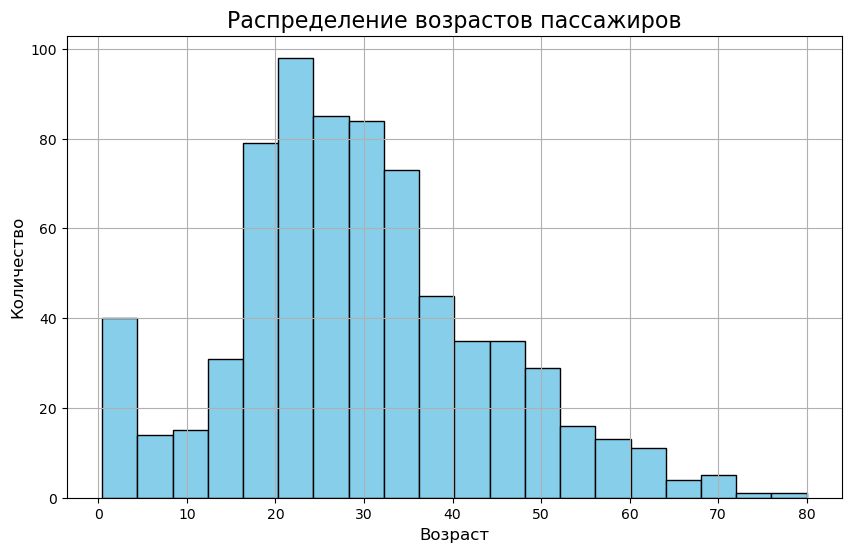

In [181]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение возрастов пассажиров', fontsize=16)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.grid(True)

plt.show()


2. Постройте гистограммы распределения цен для пассажиров разных классов

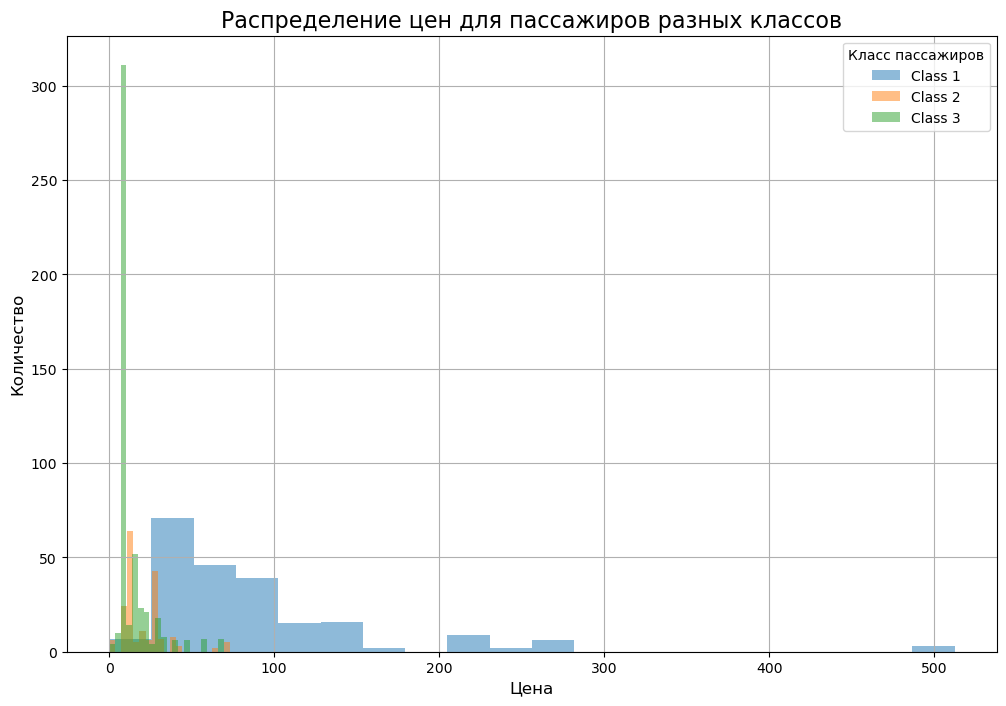

In [207]:
plt.figure(figsize=(12, 8))

for pclass in sorted(df['Pclass'].unique()):
    plt.hist(df[df['Pclass'] == pclass]['Fare'], bins=20, alpha=0.5, label=f'Class {pclass}')

plt.title('Распределение цен для пассажиров разных классов', fontsize=16)
plt.xlabel('Цена', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.legend(title="Класс пассажиров")
plt.grid(True)

plt.show()


3. Постройте зависимость цены от возраста пассажира

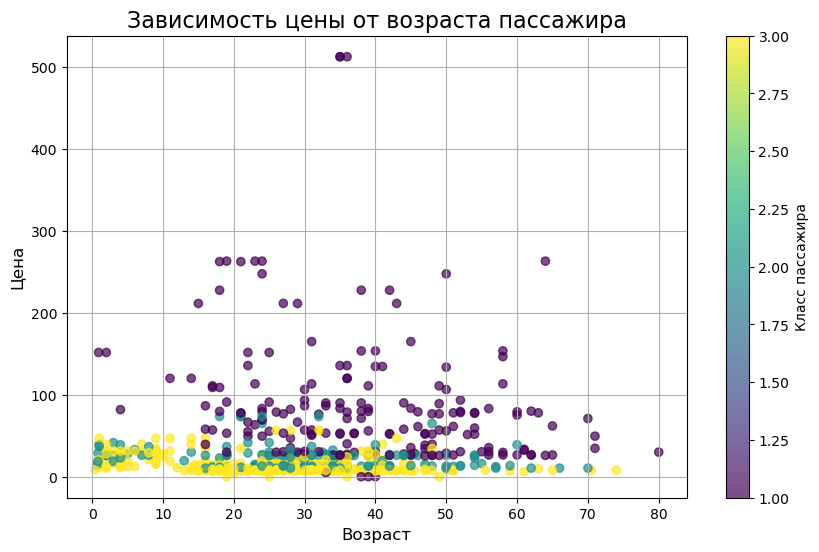

In [206]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'], c=df['Pclass'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Класс пассажира')
plt.title('Зависимость цены от возраста пассажира', fontsize=16)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.grid(True)

plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

/tmp/ipykernel_240929/2715261104.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




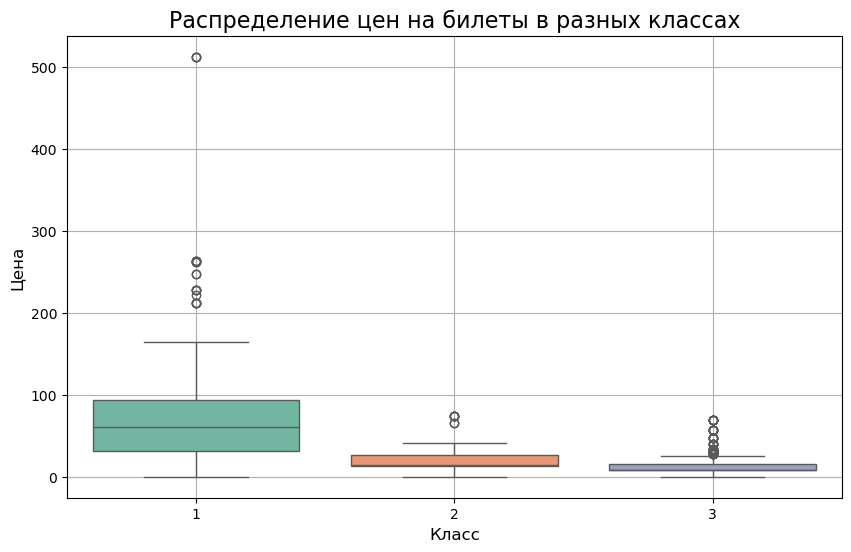

In [205]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2')

plt.title('Распределение цен на билеты в разных классах', fontsize=16)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.grid(True)

plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

/tmp/ipykernel_240929/641443479.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




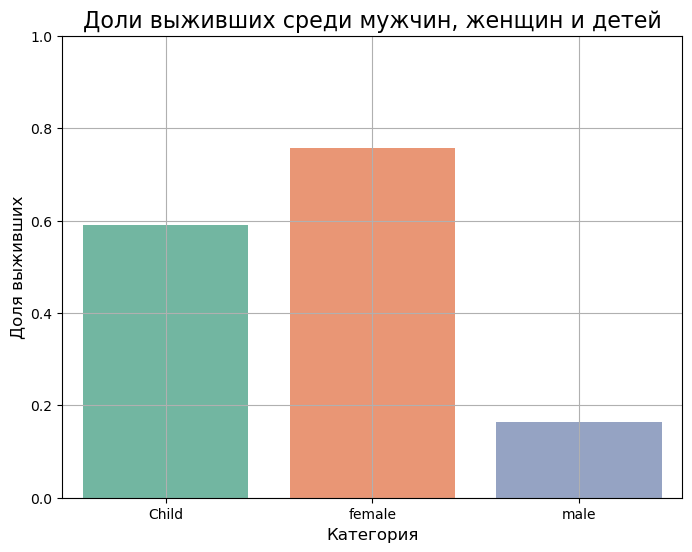

In [204]:
df['Category'] = df.apply(lambda row: 'Child' if row['Age'] < 16 else row['Sex'], axis=1)
survival_rates = df.groupby('Category')['Survived'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Survived', data=survival_rates, palette='Set2')

plt.title('Доли выживших среди мужчин, женщин и детей', fontsize=16)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Доля выживших', fontsize=12)
plt.ylim(0, 1)
plt.grid(True)

plt.show()

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

/tmp/ipykernel_240929/2520455319.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipykernel_240929/2520455319.py:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




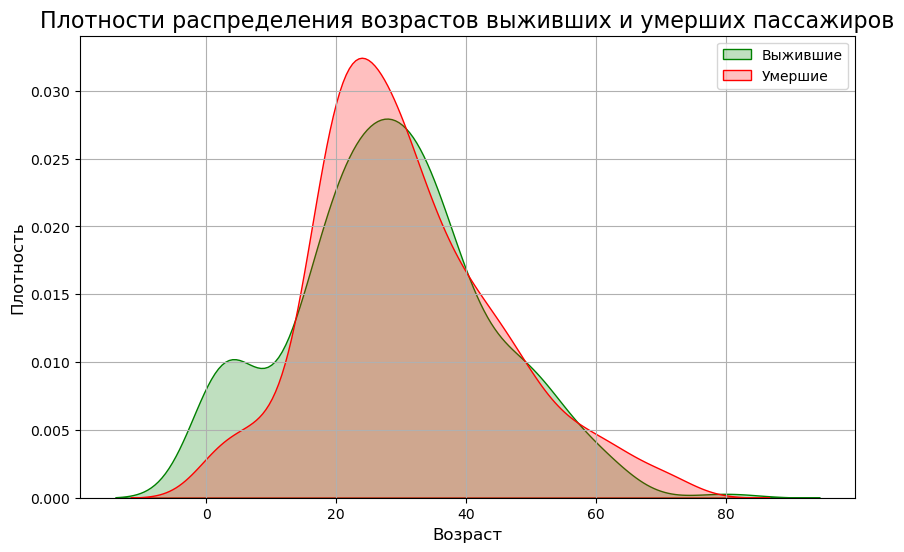

In [202]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df[df['Survived'] == 1]['Age'].dropna(), label='Выжившие', shade=True, color='green')
sns.kdeplot(data=df[df['Survived'] == 0]['Age'].dropna(), label='Умершие', shade=True, color='red')

plt.title('Плотности распределения возрастов выживших и умерших пассажиров', fontsize=16)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Плотность', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()


7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

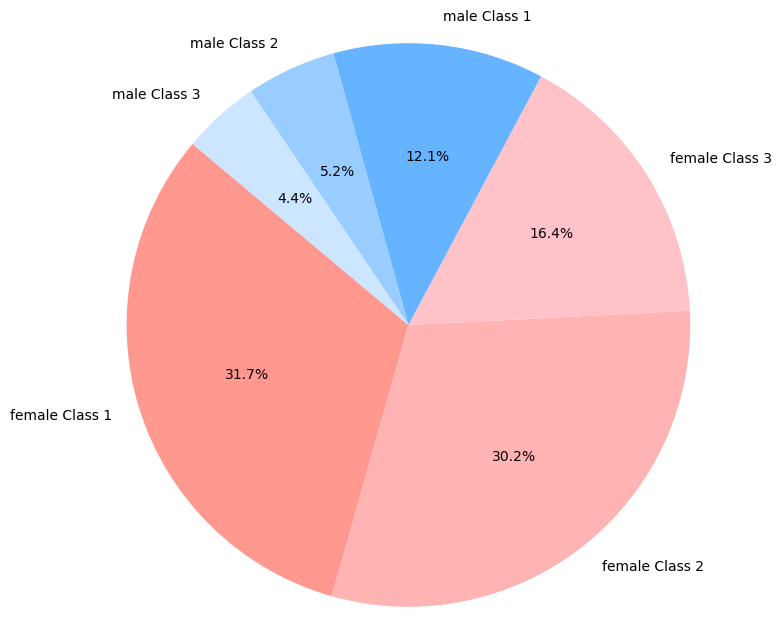

In [203]:
# Разбивка на категории по полу и классу обслуживания
df['Sex_Class'] = df['Sex'] + ' Class ' + df['Pclass'].astype(str)

# Группировка данных по новой категории и вычисление доли выживших
survival_by_sex_class = df.groupby('Sex_Class')['Survived'].mean().reset_index()

# Параметры круговой диаграммы
labels = survival_by_sex_class['Sex_Class']
sizes = survival_by_sex_class['Survived']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9990', '#ffb3b3', '#ffc2c9', '#66b3ff', '#99ccff', '#cce6ff'])
plt.axis('equal') 

plt.show()